In [51]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [52]:
# Data Scientist Jobs In UK

df_DS_UK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United Kingdom')].copy()

#Drop NaN Values from the column for plotting
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

In [53]:
df_DS_UK = df_DS_UK.explode('job_skills')

df_DS_UK[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel
...,...,...
783436,72900.0,keras
783436,72900.0,tensorflow
783436,72900.0,tableau
783436,72900.0,flow


In [14]:
df_DS_UK = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [38]:
df_DS_top_pay = df_DS_UK.sort_values(by='median', ascending=False).head(10).sort_values(by='median', ascending=True)

In [39]:
df_DS_skills = df_DS_UK.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=True)

In [36]:
print(df_DS_skills)

print(df_DS_top_pay)

            count    median
job_skills                 
excel          11   80850.0
aws            22   88128.0
pandas          9   88128.0
numpy           9   88128.0
python         50   89885.0
sql            46   97985.0
tableau        15  111500.0
r              18  113360.5
looker          9  113500.0
gcp             9  131867.0
            count    median
job_skills                 
scala           1  205000.0
word            1  165000.0
redshift        2  162500.0
keras           3  160000.0
pyspark         1  160000.0
java            1  157500.0
power bi        8  145030.0
windows         1  139216.0
github          3  139216.0
oracle          4  135500.0


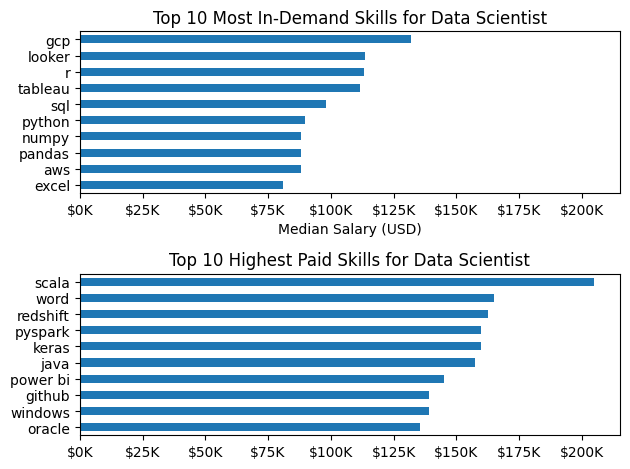

In [48]:
fig, ax = plt.subplots(2,1)

df_DS_top_pay.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest Paid Skills for Data Scientist')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
#[::-1]

df_DS_skills.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Most In-Demand Skills for Data Scientist')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlim(ax[1].get_xlim())

fig.tight_layout()